In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# %matplotlib inline
plt.style.use('ggplot')
from IPython.display import display

In [82]:
# 设置显示所有的列
pd.options.display.max_columns = None

# EDA
定位到目录

In [3]:
%pwd
#%cd Kaggle/Titanic/

'D:\\Project-Workspace\\Python-Projects\\DataAnalysis\\Kaggle\\Titanic-#1'

## 数据概览

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f"train.shape: {train.shape},  test.shape: {test.shape}.")

train.shape: (891, 12),  test.shape: (418, 11).


In [5]:
# 将 PassengerId 设置为index，它对于预测没有帮助
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)
display(train.head())
display(train.info())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


None

特征说明：
+ Pclass：Ticket Class, 取值 1 = 1st, 2 = 2nd, 3 = 3rd
+ Name: 姓名
+ Sex: 性别
+ Age: 年龄
+ SibSp: 船上有兄弟(Silbings)或配偶(Spouse)同行的人数    
兄弟和配偶关系的范围：brother, sister, stepbrother, stepsister, husband, wife
+ Parch: 船上有父母(Parents)或者子女(Children)同行的人数   
关系范围：nanny, mother, father, daughter, son, stepdaughter, stepson
+ Ticket: 船票号码
+ Fare: 船票费用
+ Cabin: 船舱编号
+ Embarked: 登船的码头，C = Cherbourg, Q = Queenstown, S = Southampton

预测变量：Survived: 0=No, 1=Yes

## 数据可视化

二分类问题，根据直觉，先检查下各个特征在预测变量上的分布。  
1. 这里不考虑Name，因为直觉上它和是否幸存没有关系。  
1. 对于船票编号Ticket，也不考虑。
1. 对于船舱编号Cabin，它的缺失值个数太多，也暂时不考虑。

In [9]:
# 为了方便绘图，需要对一些离散特征的类型做一下转换
# train = train.astype({'Sibsp': str, ''})
# train.info()

### 使用seaborn做EDA

<AxesSubplot:xlabel='Age', ylabel='Survived'>

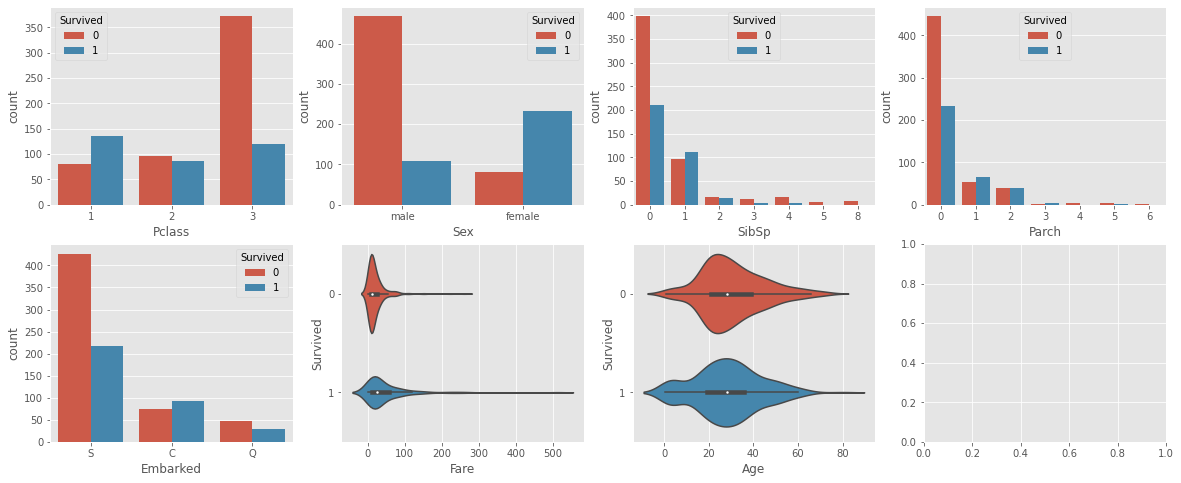

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

sns.countplot(data=train, x='Pclass', hue='Survived', ax=axes[0,0])
sns.countplot(data=train, x='Sex', hue='Survived', ax=axes[0,1])
sns.countplot(data=train, x='SibSp', hue='Survived', ax=axes[0,2])
sns.countplot(data=train, x='Parch', hue='Survived', ax=axes[0,3])
sns.countplot(data=train, x='Embarked', hue='Survived', ax=axes[1,0])
sns.violinplot(data=train, y='Survived', x='Fare', orient='h', ax=axes[1,1])
sns.violinplot(data=train, y='Survived', x='Age', orient='h', ax=axes[1,2])

### 使用plotly做EDA

可以看出，使用plotly的话，需要自己做不少数据处理的工作，没有seaborn方便。

In [38]:
pclass_bar = train.groupby(['Pclass', 'Survived'], as_index=False).size()
pclass_bar['Survived'] = pclass_bar['Survived'].astype(str)
subfig_1 = px.bar(data_frame=pclass_bar, x='Pclass', y='size', color='Survived', barmode='group')
# subfig_1.show()

In [42]:
sex_bar = train.groupby(['Sex', 'Survived'], as_index=False).size()
sex_bar['Survived'] = sex_bar['Survived'].astype(str)
subfig_2 = px.bar(data_frame=sex_bar, x='Sex', y='size', color='Survived', barmode='group')
subfig_2.update_traces(showlegend=False)
# subfig_2.show()
print()

In [43]:
sibsp_bar = train.groupby(['SibSp', 'Survived'], as_index=False).size()
sibsp_bar['Survived'] = sibsp_bar['Survived'].astype(str)
subfig_3 = px.bar(data_frame=sibsp_bar, x='SibSp', y='size', color='Survived', barmode='group')
subfig_3.update_traces(showlegend=False)
# subfig_3.show()
print()

In [44]:
parch_bar = train.groupby(['Parch', 'Survived'], as_index=False).size()
parch_bar['Survived'] = parch_bar['Survived'].astype(str)
subfig_4 = px.bar(data_frame=parch_bar, x='Parch', y='size', color='Survived', barmode='group')
subfig_4.update_traces(showlegend=False)
# subfig_4.show()
print()

In [45]:
embarked_bar = train.groupby(['Embarked', 'Survived'], as_index=False).size()
embarked_bar['Survived'] = embarked_bar['Survived'].astype(str)
subfig_5 = px.bar(data_frame=embarked_bar, x='Embarked', y='size', color='Survived', barmode='group')
subfig_5.update_traces(showlegend=False)
# subfig_5.show()
print()

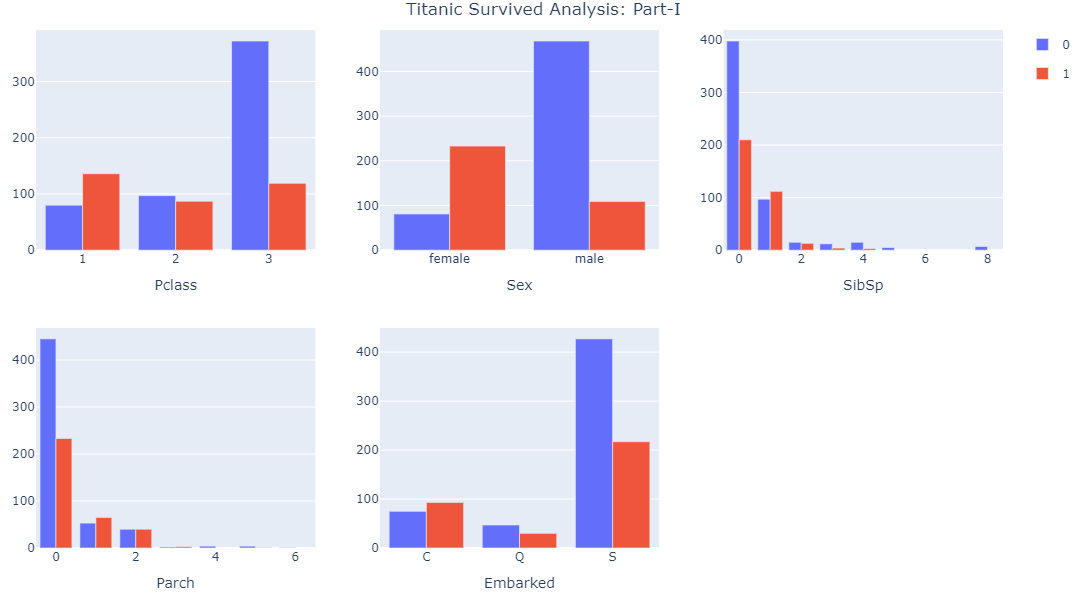

In [52]:
fig_plotly = make_subplots(rows=2, cols=3)

fig_plotly.add_traces(subfig_1['data'], rows=1, cols=1)
fig_plotly.add_traces(subfig_2['data'], rows=1, cols=2)
fig_plotly.add_traces(subfig_3['data'], rows=1, cols=3)
fig_plotly.add_traces(subfig_4['data'], rows=2, cols=1)
fig_plotly.add_traces(subfig_5['data'], rows=2, cols=2)
# fig_plotly.add_traces(subfig_6['data'], rows=2, cols=2)
# fig_plotly.add_traces(subfig_7['data'], rows=2, cols=3)

fig_plotly.update_layout(
    showlegend=True,
    width=960, height=600, autosize=False,
    margin=dict(l=30, r=30, t=30, b=30)
)

fig_plotly.update_layout(xaxis_title_text='Pclass', xaxis2_title_text='Sex', xaxis3_title_text='SibSp',
                         xaxis4_title_text='Parch', xaxis5_title_text='Embarked')

fig_plotly.update_layout(title=dict(text='Titanic Survived Analysis: Part-I', x=0.5))

In [56]:
df = train.astype({'Survived': str})
subfig_6 = px.violin(data_frame=df, x='Fare', color='Survived')
# subfig_6.update_traces(showlegend=False)
# subfig_6.show()
subfig_7 = px.violin(data_frame=df, x='Age', color='Survived')
subfig_7.update_traces(showlegend=False)
# subfig_7.show()
print()

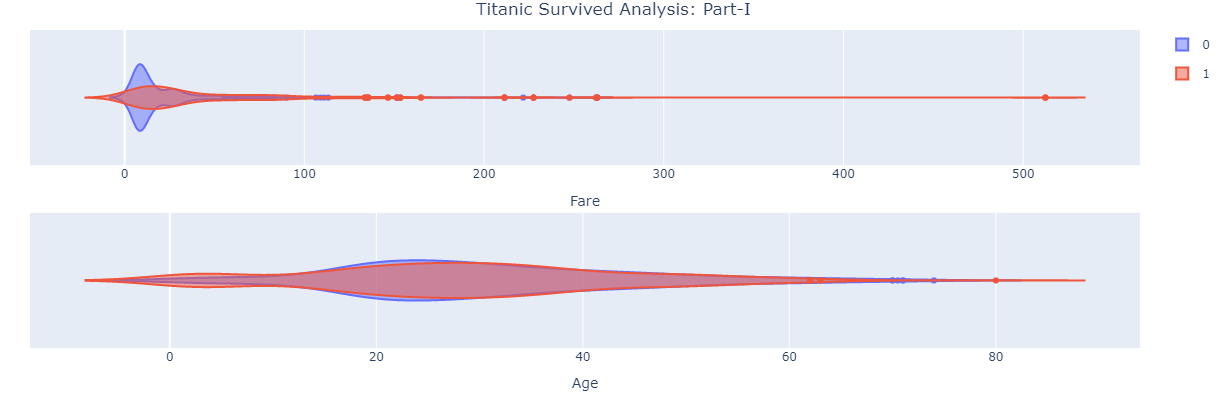

In [58]:
fig_plotly = make_subplots(rows=2, cols=1)
fig_plotly.add_traces(subfig_6['data'], rows=1, cols=1)
fig_plotly.add_traces(subfig_7['data'], rows=2, cols=1)
fig_plotly.update_layout(
    width=600, height=400, autosize=False,
    margin=dict(l=30, r=30, t=30, b=30),
    title=dict(text='Titanic Survived Analysis: Part-I', x=0.5),
    xaxis_title_text='Fare', xaxis2_title_text='Age'
)

## EDA初步结论

看起来，Pclass, Sex, SibSp, Parch, Embarked 这几个变量和是否存活有一定关系，而 Fare, Age 这两个特征似乎和是否存活没有关系。

所以后续的分析，**只选择 Pclass, Sex, SibSp, Parch, Embarked 这 5 个特征**。

In [7]:
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
train = train[cols+['Survived']]
test = test[cols]

print(f"train.shape: {train.shape},  test.shape: {test.shape}.")

train.shape: (891, 6),  test.shape: (418, 5).


# 数据预处理

In [84]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

## 缺失值检查

In [8]:
def miss_summary(df, all=True):
    """
    用于统计DF中各列的缺失值信息和占比。
    all: 是否返回所有的列，False只返回有缺失值的列
    """
    miss_num = df.isnull().sum()
    if not all:
        # 只展示有缺失值的特征
        miss_num = miss_num[miss_num > 0]
    # 总样本量
    total = df.shape[0]
    # 缺失占比
    miss_percent = miss_num/total*100
    # 各个特征的取值
    cols_values = pd.Series({col: df[col].unique() for col in df})
    # 汇总信息
    miss_info = pd.concat([miss_num, miss_percent, df.dtypes, cols_values], axis=1, keys=['miss_num', 'miss_percent','dtype', 'values'])
    miss_info['total'] = total
    miss_info = miss_info[['miss_num','total','miss_percent','dtype', 'values']]
    miss_info.dropna(inplace=True)
    # 降序排列，同时设置小数点的位数
    miss_info = miss_info.sort_values(by=['miss_num'],ascending=False).round(decimals=3)
    return miss_info

In [9]:
miss_info = miss_summary(train[cols])
miss_info

,miss_num,total,miss_percent,dtype,values
Embarked,2,891,0.224,object,"[S, C, Q, nan]"
Pclass,0,891,0.000,int64,"[3, 1, 2]"
Sex,0,891,0.000,object,"[male, female]"
SibSp,0,891,0.000,int64,"[1, 0, 3, 4, 2, 5, 8]"
Parch,0,891,0.000,int64,"[0, 1, 2, 5, 3, 4, 6]"


这里只是简单的使用众数进行缺失值填充操作。

In [10]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')
imp.fit(train[cols])
train[cols] = imp.transform(train[cols])

In [11]:
miss_summary(train[cols])

,miss_num,total,miss_percent,dtype,values
Pclass,0,891,0.0,object,"[3, 1, 2]"
Sex,0,891,0.0,object,"[male, female]"
SibSp,0,891,0.0,object,"[1, 0, 3, 4, 2, 5, 8]"
Parch,0,891,0.0,object,"[0, 1, 2, 5, 3, 4, 6]"
Embarked,0,891,0.0,object,"[S, C, Q]"


In [12]:
# 测试集没有缺失值
miss_summary(test)

,miss_num,total,miss_percent,dtype,values
Pclass,0,418,0.0,int64,"[3, 2, 1]"
Sex,0,418,0.0,object,"[male, female]"
SibSp,0,418,0.0,int64,"[0, 1, 2, 3, 4, 5, 8]"
Parch,0,418,0.0,int64,"[0, 1, 3, 2, 4, 6, 5, 9]"
Embarked,0,418,0.0,object,"[Q, S, C]"


# 特征工程

## 分类特征编码

这里主要是对特征 Sex 取值{male, female} 和 Embarked 取值 {Q, S, C} 编码。   
这两个特征都是分类特征，分类取值只有类别，没有序号关系，使用 one-hot 编码。

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
train.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
PassengerId,,,,,,
1,3,male,1,0,S,0
2,1,female,1,0,C,1
3,3,female,0,0,S,1
4,1,female,1,0,S,1
5,3,male,0,0,S,0


In [14]:
# 只对那些需要做分类特征编码的列做转换，同时指定转换的特征取值顺序
# 后续fit或者tranform时，也必须按照这个顺序传入数据
one_hot = OneHotEncoder(categories=[['male', 'female'], ['Q', 'S', 'C']], drop='first', sparse=False, handle_unknown='error')

In [15]:
# 传入的特征顺序不能为 ['Embarked', 'Sex']
one_hot.fit(train[['Sex', 'Embarked']])

OneHotEncoder(categories=[['male', 'female'], ['Q', 'S', 'C']], drop='first',
              sparse=False)

In [16]:
one_hot.categories_

[array(['male', 'female'], dtype=object), array(['Q', 'S', 'C'], dtype=object)]

In [17]:
train[['Sex_female', 'Embarked_S', 'Embarked_C']] = one_hot.transform(train[['Sex', 'Embarked']])

In [18]:
train.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived,Sex_female,Embarked_S,Embarked_C
PassengerId,,,,,,,,,
1,3,male,1,0,S,0,0.0,1.0,0.0
2,1,female,1,0,C,1,1.0,0.0,1.0
3,3,female,0,0,S,1,1.0,1.0,0.0
4,1,female,1,0,S,1,1.0,1.0,0.0
5,3,male,0,0,S,0,0.0,1.0,0.0


In [19]:
test[['Sex_female', 'Embarked_S', 'Embarked_C']] = one_hot.transform(test[['Sex', 'Embarked']])

In [20]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Sex_female,Embarked_S,Embarked_C
PassengerId,,,,,,,,
892,3,male,0,0,Q,0.0,0.0,0.0
893,3,female,1,0,S,1.0,1.0,0.0
894,2,male,0,0,Q,0.0,0.0,0.0
895,3,male,0,0,S,0.0,1.0,0.0
896,3,female,1,1,S,1.0,1.0,0.0


In [21]:
cols

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [22]:
cols_enc = ['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Embarked_S', 'Embarked_C']
train_enc = train[cols_enc + ['Survived']]
test_enc = test[cols_enc]

In [23]:
train_enc.head()

,Pclass,SibSp,Parch,Sex_female,Embarked_S,Embarked_C,Survived
PassengerId,,,,,,,
1,3,1,0,0.0,1.0,0.0,0
2,1,1,0,1.0,0.0,1.0,1
3,3,0,0,1.0,1.0,0.0,1
4,1,1,0,1.0,1.0,0.0,1
5,3,0,0,0.0,1.0,0.0,0


In [24]:
test_enc.head()

,Pclass,SibSp,Parch,Sex_female,Embarked_S,Embarked_C
PassengerId,,,,,,
892,3,0,0,0.0,0.0,0.0
893,3,1,0,1.0,1.0,0.0
894,2,0,0,0.0,0.0,0.0
895,3,0,0,0.0,1.0,0.0
896,3,1,1,1.0,1.0,0.0


## 方差过滤

In [28]:
from sklearn.feature_selection import VarianceThreshold
variance_filter = VarianceThreshold(0.1)

In [29]:
variance_filter.fit(train_enc[cols_enc])

VarianceThreshold(threshold=0.1)

In [30]:
print(cols_enc)

# 查看每个特征的方差
print(variance_filter.variances_)

# 查看threshold以上需要保留的特征，以 bool数组 的方式标识
print(variance_filter.get_support())
# 查看threshold以上需要保留的特征，以 索引数组 的方式标识
print(variance_filter.get_support(indices=True))

['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Embarked_S', 'Embarked_C']
[0.69823059 1.21467827 0.64899903 0.22821808 0.19936237 0.15300026]
[ True  True  True  True  True  True]
[0 1 2 3 4 5]


可以看出，对于这个数据集，方差过滤没啥作用。  
特别是，**对于做了 onehot-encoding 的特征，方差过滤的作用也不大**。

## 相关性过滤

In [31]:
from sklearn.feature_selection import chi2, SelectKBest

In [34]:
# 手动计算一下各个特征和目标变量的卡方值
cols_chi2, cols_p_value = chi2(train_enc[cols_enc], train[['Survived']])

print(cols_enc)
print(cols_chi2)
print(cols_p_value)

['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Embarked_S', 'Embarked_C']
[ 30.87369944   2.58186538  10.09749911 170.34812709   5.48920482
  20.46440127]
[2.75378563e-08 1.08094210e-01 1.48470676e-03 6.21058490e-39
 1.91342437e-02 6.07507131e-06]


可以看出，只有 SibSp 这个特征的卡方值较小，并且p值达到了 0.108，已经比较大了，可以考虑去除掉该特征。

In [35]:
# 这里选择 4 个特征
selector_chi2 = SelectKBest(score_func=chi2, k=4)
selector_chi2.fit(train_enc[cols_enc], train_enc[['Survived']])

SelectKBest(k=4, score_func=<function chi2 at 0x000001F299AE99D0>)

In [36]:
print(cols_enc)
print(selector_chi2.scores_)
print(selector_chi2.pvalues_)

['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Embarked_S', 'Embarked_C']
[ 30.87369944   2.58186538  10.09749911 170.34812709   5.48920482
  20.46440127]
[2.75378563e-08 1.08094210e-01 1.48470676e-03 6.21058490e-39
 1.91342437e-02 6.07507131e-06]


In [37]:
print(cols_enc)
print(selector_chi2.get_support())
print(selector_chi2.get_support(indices=True))

['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Embarked_S', 'Embarked_C']
[ True False  True  True False  True]
[0 2 3 5]


这里暂时不删除任何特征，后续如果效果不好，再考虑删除。

# 建模

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, roc_auc_score

In [61]:
# 划分 训练验证集 + 测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(train_enc[cols_enc], train_enc['Survived'], test_size=0.3, random_state=29)
# 再划分 训练集 + 验证集
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=29)

print('train + validation: ', X_trainval.shape, y_trainval.shape)
print('train: ', X_train.shape, y_train.shape)
print('validation: ', X_val.shape, y_val.shape)
print('test: ', X_test.shape, y_test.shape)

train + validation:  (623, 6) (623,)
train:  (498, 6) (498,)
validation:  (125, 6) (125,)
test:  (268, 6) (268,)


## Logistic回归

In [51]:
from sklearn.linear_model import LogisticRegression

+ 尝试拟合一下模型

In [63]:
logistic = LogisticRegression(penalty='l2', C=1, fit_intercept=True)
logistic.fit(X_train, y_train)

LogisticRegression(C=1)

In [66]:
print(logistic.coef_)
print(logistic.intercept_)
print(logistic.score(X_train, y_train))
print(logistic.score(X_val, y_val))

[[-0.91175557 -0.32439523  0.20256253  2.4773995  -0.14184574 -0.22041433]]
[0.9073249]
0.7831325301204819
0.816


In [67]:
print(logistic.penalty)
print(logistic.classes_)
print(logistic.n_features_in_)
print(logistic.n_iter_)

l2
[0 1]
6
[19]


+ 使用交叉验证检查下效果

In [68]:
cv_score = cross_val_score(logistic, X_trainval, y_trainval, cv=5)
cv_score

array([0.744     , 0.816     , 0.752     , 0.7983871 , 0.83870968])

In [70]:
cv_val_res = cross_validate(logistic, X_trainval, y_trainval, cv=5, scoring=['accuracy', 'recall_macro'], return_train_score=True)
cv_val_res

{'fit_time': array([0.00499773, 0.00499892, 0.00500321, 0.00499916, 0.00400162]),
 'score_time': array([0.00200105, 0.00100088, 0.00199699, 0.00099945, 0.00200939]),
 'test_accuracy': array([0.744     , 0.816     , 0.752     , 0.7983871 , 0.83870968]),
 'train_accuracy': array([0.81124498, 0.78514056, 0.78714859, 0.79158317, 0.78557114]),
 'test_recall_macro': array([0.71766775, 0.79572511, 0.74892589, 0.77412281, 0.81085526]),
 'train_recall_macro': array([0.78691922, 0.76275376, 0.7685866 , 0.77075079, 0.76202208])}

+ 对正则项参数$C$做超参数搜索

In [77]:
C_params = {'C': [0.2, 0.4, 0.5, 0.6, 0.8, 1.0, 1.2, 1.4, 1.5, 1.6]}
lr = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=200)
grid_cv = GridSearchCV(lr, param_grid=C_params, cv=5, scoring='accuracy', return_train_score=True)
grid_cv.fit(X_trainval, y_trainval)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.2, 0.4, 0.5, 0.6, 0.8, 1.0, 1.2, 1.4, 1.5,
                               1.6]},
             return_train_score=True, scoring='accuracy')

In [86]:
cv_res_df = pd.DataFrame(grid_cv.cv_results_)
cv_res_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004405,0.000484,0.000999,1.295085e-05,0.2,{'C': 0.2},0.744,0.816,0.768,0.798387,0.854839,0.796245,0.038355,1,0.809237,0.795181,0.789157,0.797595,0.781563,0.794547,0.009199
1,0.004734,0.000388,0.001000,8.341244e-07,0.4,{'C': 0.4},0.744,0.816,0.752,0.798387,0.838710,0.789819,0.036548,2,0.813253,0.787149,0.787149,0.791583,0.781563,0.792139,0.011025
2,0.004400,0.000490,0.000806,4.031366e-04,0.5,{'C': 0.5},0.744,0.816,0.752,0.798387,0.838710,0.789819,0.036548,2,0.813253,0.787149,0.787149,0.791583,0.781563,0.792139,0.011025
3,0.004764,0.000339,0.001013,1.650049e-05,0.6,{'C': 0.6},0.744,0.816,0.752,0.798387,0.838710,0.789819,0.036548,2,0.813253,0.787149,0.787149,0.791583,0.781563,0.792139,0.011025
4,0.004400,0.000489,0.001000,4.623108e-07,0.8,{'C': 0.8},0.744,0.816,0.752,0.798387,0.838710,0.789819,0.036548,2,0.811245,0.785141,0.787149,0.791583,0.781563,0.791336,0.010468
5,0.004513,0.000441,0.000803,4.016179e-04,1.0,{'C': 1.0},0.744,0.816,0.752,0.798387,0.838710,0.789819,0.036548,2,0.811245,0.785141,0.787149,0.791583,0.785571,0.792138,0.009822
6,0.004399,0.000478,0.000801,4.003535e-04,1.2,{'C': 1.2},0.744,0.816,0.752,0.798387,0.838710,0.789819,0.036548,2,0.811245,0.785141,0.787149,0.791583,0.785571,0.792138,0.009822
7,0.004389,0.000489,0.001001,9.702201e-07,1.4,{'C': 1.4},0.744,0.816,0.752,0.798387,0.838710,0.789819,0.036548,2,0.811245,0.785141,0.787149,0.791583,0.785571,0.792138,0.009822
8,0.004533,0.000441,0.001000,1.040336e-06,1.5,{'C': 1.5},0.744,0.816,0.752,0.798387,0.838710,0.789819,0.036548,2,0.811245,0.785141,0.787149,0.791583,0.785571,0.792138,0.009822
9,0.006600,0.004224,0.000800,4.001143e-04,1.6,{'C': 1.6},0.744,0.816,0.752,0.798387,0.838710,0.789819,0.036548,2,0.811245,0.785141,0.787149,0.791583,0.785571,0.792138,0.009822


In [98]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'C': 0.2}
0.7962451612903226


In [99]:
# 注意，这里获得的最佳模型已经是在整个 X_trainval 重新拟合过的了
logistic_best = grid_cv.best_estimator_

In [100]:
cross_val_score(logistic_best, X_trainval, y_trainval, cv=5)

array([0.744     , 0.816     , 0.768     , 0.7983871 , 0.85483871])

## 决策树

## 随机森林

## XGBoost

## SVM